In [ ]:
########################################################################
# Author    : A. Alsema
# Date      : 2021
# Dataset   : Visium Spatial Transcriptomics for MS lesions
# Purpose   : perform PCA on GM samples
# Required input: "4.GM.integrated_withoutleuko_scaled.rds"
#########################################################################

In [2]:
rm(list = ls())

library(Seurat)
library(hdf5r)
library(ggplot2)
library(patchwork)
library(future)
library(dplyr)
library(RColorBrewer)
options(future.globals.maxSize = 3000 * 1024^2)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,3507271,187.4,5372100,287.0,5372100,287.0
Vcells,635481836,4848.4,894629876,6825.5,635514744,4848.6


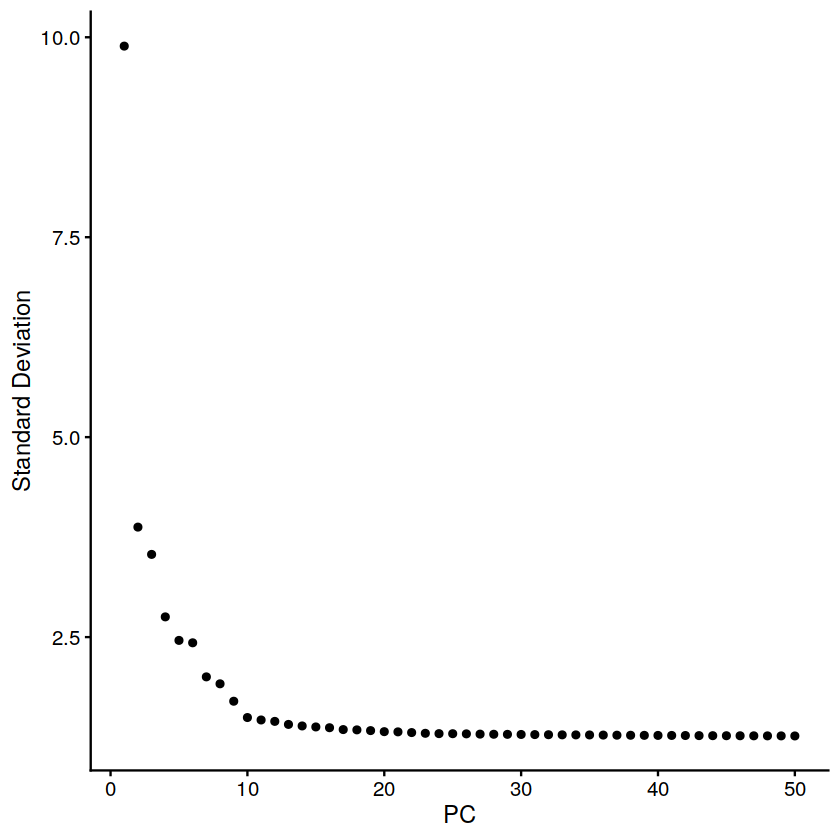

In [3]:
st.integrated <- readRDS("4.GM.integrated_withoutleuko_scaled.rds")
DefaultAssay(st.integrated) <- "integrated"
gc()
ElbowPlot(st.integrated, ndims = 50)

In [4]:
# filtering of low-content spots
dim(st.integrated)
st.integrated <- subset(st.integrated, subset = nFeature_Spatial > 100) # 
dim(st.integrated)

[1]  4000 43083

Warning message:
“Key ‘slice1_’ taken, using ‘ydgab_’ instead”
Warning message:
“Key ‘slice1_’ taken, using ‘slice11_’ instead”
Warning message:
“Key ‘slice1_’ taken, using ‘slice12_’ instead”
Warning message:
“Key ‘slice1_’ taken, using ‘slice13_’ instead”
Warning message:
“Key ‘slice1_’ taken, using ‘slice14_’ instead”
Warning message:
“Key ‘slice1_’ taken, using ‘slice15_’ instead”
Warning message:
“Key ‘slice1_’ taken, using ‘slice16_’ instead”
Warning message:
“Key ‘slice1_’ taken, using ‘slice17_’ instead”
Warning message:
“Key ‘slice1_’ taken, using ‘slice18_’ instead”
Warning message:
“Key ‘slice1_’ taken, using ‘slice19_’ instead”


[1]  4000 42753

In [5]:
# some paired colors for the group
col_vector <- rev(brewer.pal(n =4, name = "Paired"))

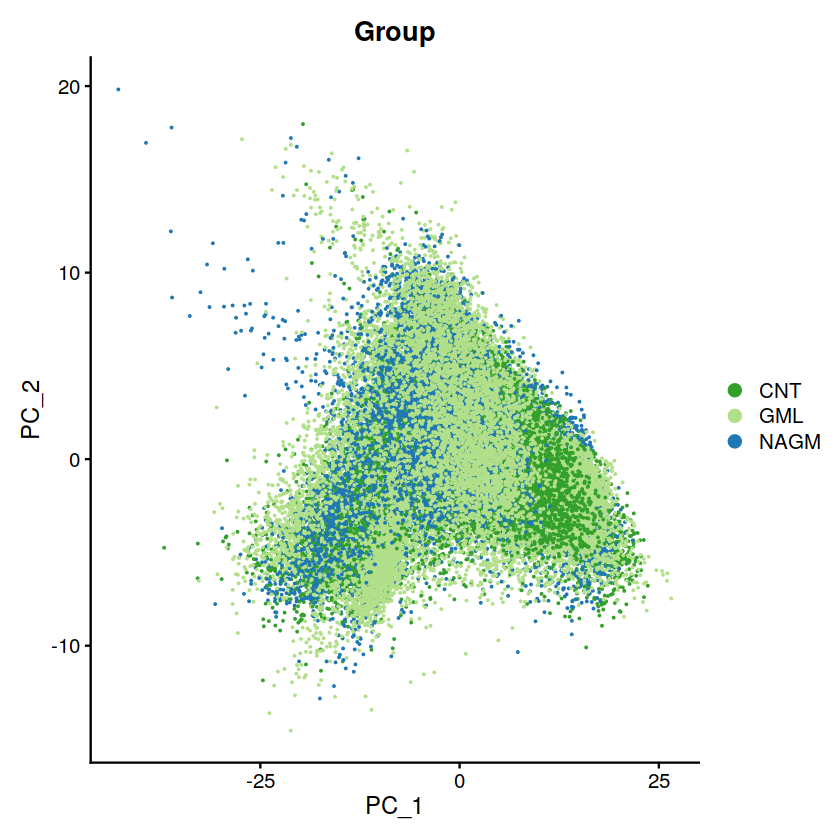

In [6]:
DimPlot(st.integrated, reduction = "pca", group.by = "Group", cols = col_vector, dims = c(1,2))
# dev.off()

In [7]:
table(st.integrated$Group)


  CNT   GML  NAGM 
11485 20119 11149 

In [ ]:
pdf('Routput/pca.pdf')

DimPlot(st.integrated, reduction = "pca", group.by = "Group", cols = col_vector, dims = c(1,2))
DimPlot(st.integrated, reduction = "pca", group.by = "Group", cols = col_vector, dims = c(1,3))
dev.off()

pdf('Routput/pca_sample.pdf')
DimPlot(st.integrated, reduction = "pca", group.by = "orig.ident",dims = c(1,2))
dev.off()